# Lending Club Assignment

A consumer finance company called **Lending Club** which provides lending various types of loans to customers.customers can easily access lower interest rate loans through online interface. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile.
When a person applies for a loan, there are two types of decisions that could be taken by the company:

**Loan accepted:** If the company approves the loan, there are 3 possible scenarios described below:

**Fully paid:** Applicant has fully paid the loan along with principle and interest rate

**Current:** Applicant is in the process of paying the instalments, i.e, the tenure of the loan is not yet completed.

**Charged-off:** Applicant has not paid the instalments for a long period of time, i.e. he/she has defaulted on the loan 

**Loan rejected:** The company had rejected the loan (because the candidate does not meet their requirements etc.)

### Business Goal:
The main cause of financial loss (called credit loss) is issuing loans to 'risky' borrowers, including most all financing firms. The loss of credit is the amount of money that the lender lost when the borrower refuses to pay or run away with the money owed. In other words, the creditors who default incur the greatest amount of damage to the lender.

The goal is to recognise the unsafe loan borrowers at the time of the loan application * * so that those debts can be minimised by reducing the amount of credit losses. The purpose of this case study is to classify such applicants using EDA.

### EDA

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set(style='whitegrid')

In [53]:
# Reading csv file
data=pd.read_csv('loan.csv',encoding ="ISO-8859-1",low_memory=False)

In [54]:
# dimensions of input file
data.shape

(39717, 111)

In [55]:
# High level statistics
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


### As there are many columns which are not required and clean the required columns, we need to clean the data , let's check at missing values first

In [56]:
data.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [57]:
###Let's check at percentage of missing values for each column in percentages
nans=round(100*(data.isnull().sum()/len(data.id)), 2)
nans.loc[nans>0]

emp_title                           6.19
emp_length                          2.71
desc                               32.58
title                               0.03
mths_since_last_delinq             64.66
mths_since_last_record             92.99
revol_util                          0.13
last_pymnt_d                        0.18
next_pymnt_d                       97.13
last_credit_pull_d                  0.01
collections_12_mths_ex_med          0.14
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m     

### It is recommended to remove the columns with the missing values above 50%

In [58]:
# displaying the columns with missing values above 50%
nans_above50=list(nans[nans>=50].index)
len(nans_above50)

57

### as we observe, out of 111 columns, 57 columns has null values , let's remove those

In [59]:
data=data.drop(nans_above50,axis=1)
data.shape

(39717, 54)

In [60]:
# let's inspect further missing values
nans=round(100*(data.isnull().sum()/len(data.id)),2)
nans[nans!=0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

### The column desc contains description, which is not required for our case, hence we rome that column from the main dataset

In [61]:
data=data.drop('desc',axis=1)
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [62]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### Here, we have few categorical columns , let's try to examine those

In [63]:
print("no of values for column emp_title : %d"  % len(data.emp_title.unique()))
print("no of values for column emp_length: %d"  % len(data.emp_length.unique()))
print("no of values for column title : %d"  % len(data.title.unique()))
print("no of values for column revol_util : %d"  % len(data.revol_util.unique()))
print("no of values for column last_pymnt_d : %d"  % len(data.last_pymnt_d.unique()))
print("no of values for column last_credit_pull_d : %d"  % len(data.last_credit_pull_d.unique()))
print("no of values for column collections_12_mths_ex_med : %d"  % len(data.collections_12_mths_ex_med.unique()))
print("no of values for column chargeoff_within_12_mths : %d"  % len(data.chargeoff_within_12_mths.unique()))
print("no of values for column pub_rec_bankruptcies : %d"  % len(data.pub_rec_bankruptcies.unique()))
print("no of values for column tax_liens : %d"  % len(data.tax_liens.unique()))

no of values for column emp_title : 28821
no of values for column emp_length: 12
no of values for column title : 19616
no of values for column revol_util : 1090
no of values for column last_pymnt_d : 102
no of values for column last_credit_pull_d : 107
no of values for column collections_12_mths_ex_med : 2
no of values for column chargeoff_within_12_mths : 2
no of values for column pub_rec_bankruptcies : 4
no of values for column tax_liens : 2


### It is indicative that few columns have less no of values, clearly implies that those are categorical variables.let's examine those

In [64]:
data.tax_liens.unique()

array([ 0., nan])

In [65]:
data.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [66]:
data.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [67]:
data.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [68]:
data.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

### It is observed that columns collections_12_mths_ex_med. , chargeoff_within_12_mths and tax_liens has values 0 and nan, which isn't usefult to the case study, hence we eliminate them

In [69]:
drop_cat=['chargeoff_within_12_mths','tax_liens','collections_12_mths_ex_med']
data=data.drop(drop_cat,axis=1)
data.shape

(39717, 50)

### let's look at column pub_rec_bankruptcies to check whether there are significant bankruptcies in the past

In [70]:
data.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

### as we observe, there are significant numbers of no bankruptcies, we remove the nulls (if any) to keep the data unbiased

In [71]:
data=data[~data.pub_rec_bankruptcies.isnull()]

In [73]:
# Check for remaining nulls in the data
nans=round(100*(data.isnull().sum()/len(data.id)), 2) 
nans[nans!= 0]

emp_title       6.19
emp_length      2.75
title           0.03
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

### Let's remove null values from all the  columns

In [74]:
data=data[~data.emp_title.isnull()]
data=data[~data.emp_length.isnull()]
data=data[~data.title.isnull()]
data=data[~data.revol_util.isnull()]
data=data[~data.last_pymnt_d.isnull()]

In [75]:
nans=round(100*(data.isnull().sum()/len(data.id)), 2) 
nans[nans!=0]

Series([], dtype: float64)

### now, we've removed all the nulls , which are not useful for the data analysis. let's create csv based on the cleaned dataset

In [76]:
data.to_csv('clean_data.csv', encoding='utf-8', index=False)

In [77]:
clean_data=pd.read_csv('clean_data.csv')
clean_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0,0.0
1,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0,0,0.0
2,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,0.00,May-16,67.79,May-16,1,INDIVIDUAL,0,0,0.0
3,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,0.00,0.00,Jan-15,161.03,Jan-16,1,INDIVIDUAL,0,0,0.0
4,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,0.00,0.00,May-16,1313.76,May-16,1,INDIVIDUAL,0,0,0.0


In [79]:
clean_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'policy_code',
       'application_type', 'acc_now_delinq', 'delinq_amnt',
       'pub_rec_bankruptcies'],
      dtype='object')

### Let's check the columns which are still not required in the dataset

In [80]:
clean_data.nunique().sort_values()

acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_

### there are still columns which doesnt contribute much to the data

These columns are:
1. __id__
:<br>is a random number given to the loan, does not contribute to our analysis
2. __member_id__
:<br>is a random number given to the member, does not contribute to our analysis
3. __pymnt_plan__
:<br> value for entire dataset is 'n', therefore can be removed.
4. __url__
:<br>is a URL for LC page for corresponding to each memberid, nothing to do with loan default.
5. __funded_amnt_inv__
:<br> value for this column is almost equivalent to funded_amnt.
6. __zip_code__
:<br>first 3 digits of the 5 digit zip code are visible, does not contribute to analysis
7. __initial_list_status__
:<br> value for entire dataset is 'f' out of the possible values, therefore they  can be removed.
8. __policy_code__
:<br> value for entire dataset is '1',nothing to contribute for analysis, to be removed.
9. __application_type__
:<br>value for entire dataset is 'INDIVIDUAL'.
10. __acc_now_delinq__
:<br>value for entire dataset is '0', therefore can be removed.
11. __delinq_amnt__
:<br>value for entire dataset is '0', therefore can be removed.
12. __funded_amnt__
:<br> value for this column is almost equivalent to loan_amnt.

In [82]:
# we can drop the above columns
columns_drop= ['id','member_id','funded_amnt','funded_amnt_inv','pymnt_plan','url','zip_code','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt',]
clean_data= clean_data.drop(columns_drop,axis=1)

In [83]:
clean_data.shape

(36433, 38)

In [84]:
clean_data.describe()

,loan_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,36433.000000,36433.000000,3.643300e+04,36433.000000,36433.000000,36433.00000,36433.000000,36433.000000,36433.000000,36433.000000,...,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000
mean,11307.679851,326.186394,6.930522e+04,13.444131,0.146131,0.86493,9.351604,0.053715,13465.657481,22.245876,...,52.213313,12310.968657,11841.070656,9912.408471,2304.404937,1.299840,92.855490,11.677065,2742.955476,0.041418
std,7433.859357,207.389943,6.354244e+04,6.643308,0.492199,1.06343,4.373772,0.234995,15702.093047,11.376692,...,378.443825,9048.420885,8911.319070,7053.212865,2629.542911,7.065629,682.047187,140.880327,4473.528922,0.200221
min,500.000000,16.080000,4.000000e+03,0.000000,0.000000,0.00000,2.000000,0.000000,0.000000,2.000000,...,0.000000,33.730000,0.000000,0.000000,6.220000,0.000000,0.000000,0.000000,0.010000,0.000000
25%,5600.000000,168.900000,4.200000e+04,8.360000,0.000000,0.00000,6.000000,0.000000,3832.000000,14.000000,...,0.000000,5672.557913,5413.410000,4800.000000,678.010000,0.000000,0.000000,0.000000,226.280000,0.000000
50%,10000.000000,283.280000,6.000000e+04,13.540000,0.000000,1.00000,9.000000,0.000000,9030.000000,21.000000,...,0.000000,10101.589360,9632.040000,8123.600000,1379.820000,0.000000,0.000000,0.000000,571.700000,0.000000
75%,15000.000000,432.220000,8.300000e+04,18.690000,0.000000,1.00000,12.000000,0.000000,17231.000000,29.000000,...,0.000000,16700.719980,16094.490000,14000.000000,2891.860000,0.000000,0.000000,0.000000,3457.580000,0.000000
max,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.00000,44.000000,4.000000,149588.000000,90.000000,...,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


### from the data, it is observed that few columns need to be rounded off to certain decimal points

### The columns that need rounding are: 
1. total_pymnt
2. total_rec_late_fee
3. collection_recovery_fee

### let's examine each and every column

In [90]:
clean_data.total_pymnt.value_counts().head()

11196.569430    26
11784.232230    16
13148.137860    15
5478.387981     13
10956.775960    13
Name: total_pymnt, dtype: int64

In [93]:
clean_data.collection_recovery_fee.value_counts().tail()

9.6738      1
33.2896     1
6.9239      1
340.0000    1
258.9138    1
Name: collection_recovery_fee, dtype: int64

In [94]:
clean_data.total_rec_late_fee.value_counts().tail()

14.971231    1
52.840000    1
14.997547    1
33.483779    1
17.165009    1
Name: total_rec_late_fee, dtype: int64

In [95]:
clean_data.total_pymnt= round(clean_data.total_pymnt,2)
clean_data.total_rec_late_fee= round(clean_data.total_rec_late_fee,2)
clean_data.collection_recovery_fee= round(clean_data.collection_recovery_fee,2)

Next, there are few columns which denote date or month information but are of the type object in the dataframe. Let's change the dtype of all such columns to datetime. this will help in further using these column values to its best for analysis.<br>
These columns are:
1. last_pymnt_d
2. last_credit_pull_d
3. issue_d
4. earliest_cr_line

In [97]:
# converting the required columns to datetime
datetime=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
clean_data[datetime].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36433 entries, 0 to 36432
Data columns (total 4 columns):
issue_d               36433 non-null object
earliest_cr_line      36433 non-null object
last_pymnt_d          36433 non-null object
last_credit_pull_d    36433 non-null object
dtypes: object(4)
memory usage: 1.1+ MB


### going further, there are few columns expressing % like int_rate and revol_util.
### <br>typecast this values into float

In [98]:
clean_data.revol_util.describe()

count     36433
unique     1082
top          0%
freq        852
Name: revol_util, dtype: object

In [99]:
clean_data.int_rate.describe()

count      36433
unique       334
top       10.99%
freq         901
Name: int_rate, dtype: object

In [100]:
# let's clean these columns and turn it to float
clean_data['int_rate'] = clean_data['int_rate'].str.strip('%').astype('float')
clean_data['revol_util'] = clean_data['revol_util'].str.strip('%').astype('float')

In [102]:
# verify the columns and make sure those are of type float
clean_data[['int_rate','revol_util']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36433 entries, 0 to 36432
Data columns (total 2 columns):
int_rate      36433 non-null float64
revol_util    36433 non-null float64
dtypes: float64(2)
memory usage: 569.3 KB


### Let us now take a look at the another column emp_length , which has to be cleaned

In [103]:
clean_data.emp_length.value_counts()

10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

### As we observe, the column has values like < ,+ which has to be removed and turn values into float

In [106]:
# create a dictionary and replace the column with appropriate values
emp_length_clean={
    '< 1 year':0,
    '1 year':1,
    '2 years':2,
    '3 years':3,
    '4 years':4,
    '5 years':5,
    '6 years':6,
    '7 years':7,
    '8 years':8,
    '9 years':9,
    '10+ years':10
}

In [107]:
clean_data=clean_data.replace({"emp_length": emp_length_clean })

In [108]:
# verify the column values once again
clean_data.emp_length.value_counts()

10    8407
2     4178
0     4052
3     3914
4     3297
5     3129
1     3026
6     2121
7     1697
8     1405
9     1207
Name: emp_length, dtype: int64

### Column tern : this column has categorial values like 36 months, 60 months, let's replace this with appropriate integer values

In [109]:
clean_data.term.value_counts()

 36 months    26377
 60 months    10056
Name: term, dtype: int64

In [110]:
# converting into float using lambda function
clean_data['term']=clean_data.term.apply(lambda x: x.split()[0])

In [111]:
clean_data.term.value_counts()

36    26377
60    10056
Name: term, dtype: int64

### now, we have remaining two columns which can be dropped and as those are not required for our analysis : __earliest_cr_line__ and __issue_d__

In [120]:
clean_data=clean_data.drop(['earliest_cr_line','issue_d'],axis=1)
clean_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,2500,60,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
1,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
2,3000,60,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
3,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
4,7000,60,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,...,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


In [121]:
### Now, we've to exte=ract cleaned dataset as csv output
clean_data.to_csv('master_data.csv', encoding='utf-8', index=False)

# Analysis(Univariate)

In [122]:
master_data=pd.read_csv('master_data.csv')
master_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,2500,60,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
1,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
2,3000,60,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
3,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
4,7000,60,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,...,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


In [124]:
master_data.shape

(36433, 36)

### The column loan status is important to decide to make a decision for loan approval based on the applicant’s profile

In [125]:
master_data['loan_status'].value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

In [131]:
(master_data['grade'].value_counts(normalize=True)*100).sort_index()

A    25.843300
B    30.305087
C    20.304238
D    13.184607
E     7.015014
F     2.550400
G     0.797353
Name: grade, dtype: float64

### We keep fully paid and charged off columns and exclude current 

In [126]:
master_data= master_data[master_data['loan_status'].isin(['Fully Paid','Charged Off'])]
master_data.shape

(35367, 36)

### Functions to display bargraphs with labels (ref - https://stackoverflow.com/a/48372659 )

In [154]:

def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches 
    i = 0
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # placing a label for each bar
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        #setting number of points between bar and label
        space = 5
        # setting Vertical alignment for positive values
        va = 'bottom'

        # placing the label below bar if value is negative
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal point
        if d is None:
            label = "{:.1f}".format(y_value)
        else:
            try:
                label = "{:.1f}".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [155]:
# This function plots a given column buckets against loan_status (default = 'Charged Off')
# The plots are in percentages 
# (absolute numbers do not make sense -> category values can have very different absolute numbers)
# We want to see what are the chances of some category leading to loan default
# Absolute numbers are also printed to assess level of confidence in a % value. 
def plotLoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    #print(grp)
    percentages = grp.unstack() * 100 / cnt.T
    #print(percentages)
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    showLabels(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

In [156]:
# This method plots a distribution of target column, and its boxplot against loan_status column
def plot_distribution(dataframe, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(dataframe[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    plt.show()

In [170]:
# This method prints two plots side by side 
# Left one is percentage of a categorical variable in the entire dataset 
# Right one is percentage for Charged Off loans 
# Significant changes in percentage from left to right can indicate a value of interest
def plot_percentages(dataframe, by, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (master_data[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    showLabels(ax)
    plt.subplot(1, 2, 2)
    #ax = master_loan.groupby('loan_status')['term'].value_counts(normalize=True).loc[:'Charged Off'].plot.bar(color=sns.color_palette('husl', 16))
    values = (master_data.loc[master_data['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)
    showLabels(ax)

### visualize the distribution of loan_status 

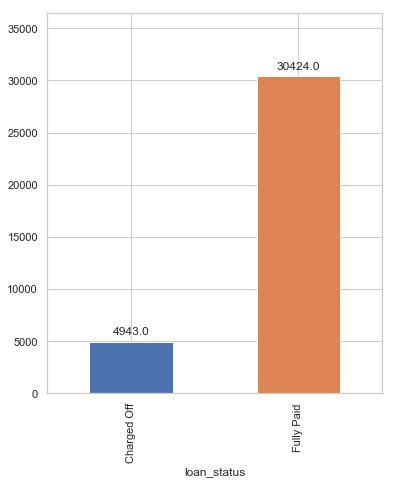

In [158]:
plt.style.context('dark_background')
plt.figure(figsize=(6,7))
ax=master_data.groupby('loan_status')['loan_amnt'].count().plot.bar()
showLabels(ax)
plt.show()

In [159]:
# let's try to group loan status and loan amount
master_data.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,12286.147077,8064.255961,1000.0,6000.0,10000.0,17000.0,35000.0
Fully Paid,30424.0,10945.731166,7181.867451,500.0,5500.0,9600.0,15000.0,35000.0


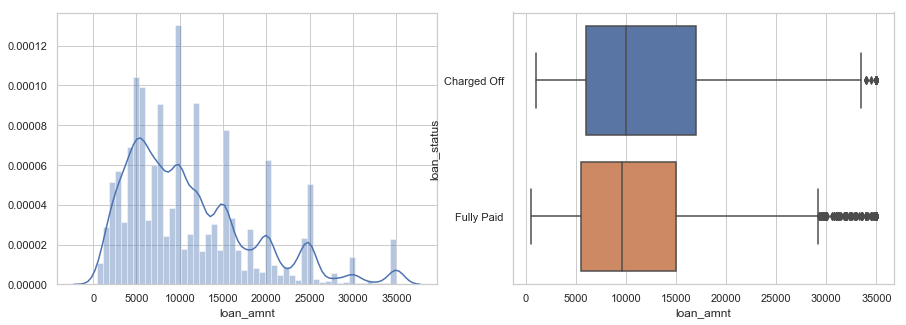

In [160]:
plot_distribution(master_data, 'loan_amnt')

In [161]:
#Create Derived categorical variable
master_data['loan_amnt_bin'] = pd.cut(master_data['loan_amnt'], 
                                      [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])


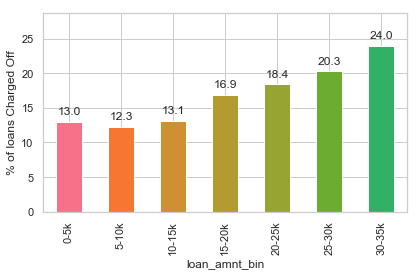

In [162]:
plotLoanStatus(master_data, 'loan_amnt_bin')

In [163]:
def categoricalBarPlots(df, arr):
    rows = int(len(arr)/2)
    for idx, val in enumerate(arr, start=1):
        plt.subplot(rows, 2, idx)
        ax = df.groupby(val).loan_amnt.count().plot.bar(color=sns.color_palette('husl', 16))
        showLabels(ax)

    plt.tight_layout()

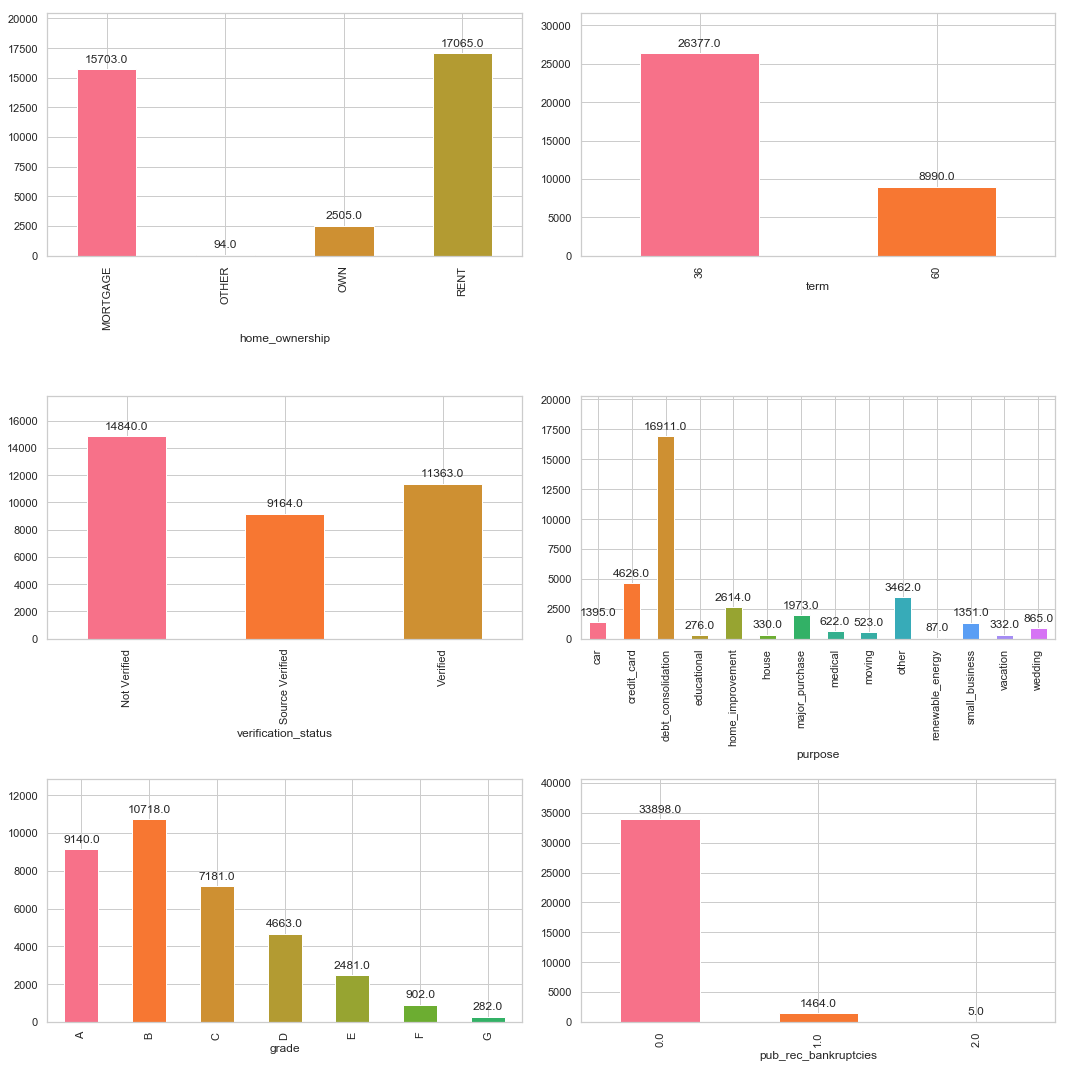

In [164]:
plt.figure(figsize=(15,15))

categoricalBarPlots(master_data, ['home_ownership', 'term', 'verification_status', 'purpose', 'grade', 'pub_rec_bankruptcies'])

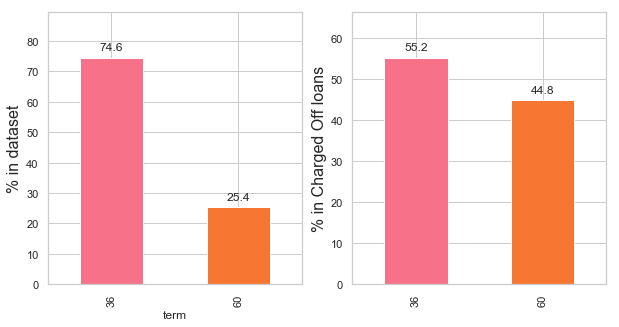

In [171]:
plt.figure(figsize=(10,5))
plot_percentages(master_data, 'term')

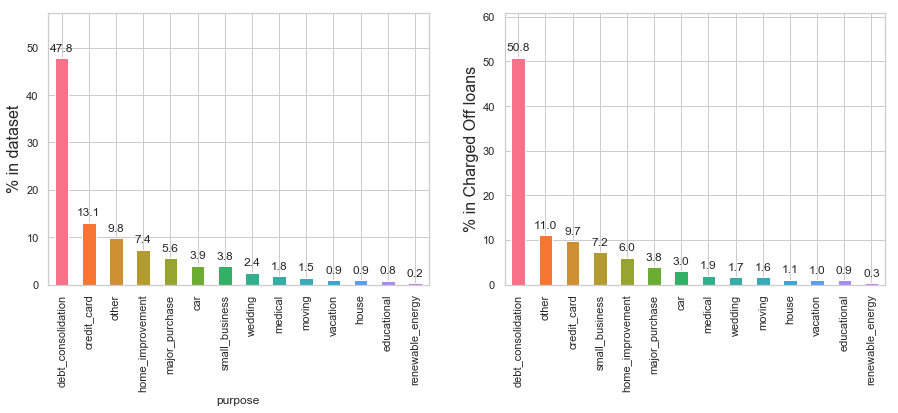

In [172]:
plt.figure(figsize=(15,5))
plot_percentages(master_data, 'purpose')

_It is observed that purpose 'small business' in the charged-off loans is spiked up, let's see the percentage increase_  

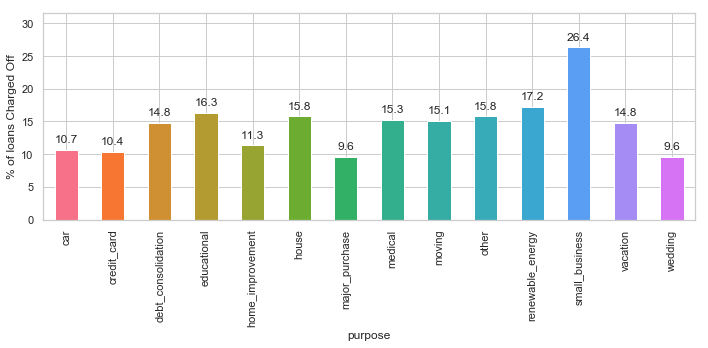

In [173]:
plt.figure(figsize=(10, 5))
plotLoanStatus(master_data, 'purpose')

_Observation : It is evident that 26.4% of charged off loans falls under small business loans_

### visualize the distribution of grade and sub-grade 